<a href="https://colab.research.google.com/github/JonasLeijoto/Data_Science/blob/main/Rio_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Rio de Janeiro*

Quando planejamos fazer uma viagem, a hospedagem é, normalmente, um dos itens que mais pesa no bolso.

Rompendo a hegemonia dos hotéis, em 2008 surge a Startup **[Airbnb](https://www.airbnb.com.br/)** que veio com a promessa de conectar proprietários de imóveis vagos - chamados de anfitriões - com pessoas interessadas em passar uma temporada fora de casa, mas sem deixar *um rim* na rede hoteleira.

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

O sucesso foi tão grande que em 2018, a empresa já havia **hospedado 300 milhões de pessoas** em todo mundo, "forçando" até os próprios hotéis a ofereceram hospedagem na plataforma.

O portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) reúne uma quantidade enorme de dados da empresa nas principais cidades do mundo e, projetos de *Data Science* podem trazer diversos *Insights* sobre padrões de comportamento e preferências dos consumidores e anfitriões.


Neste *notebook*, iremos explorar os dados referentes à **Cidade Maravilhosa** para entender melhor as particularidades do Airbnb na região.

## Panorama do Rio de Janeiro

Segundo o último boletim de Sondagem Empresarial - Agências e Organização de Viagens no Brasil disponibilizadas pelo Ministério do Turismo [nesse link](http://dadosefatos.turismo.gov.br/component/k2/itemlist/category/17.html) com pesquisas realizadas em agosto de 2020, apontava a cidade do **Rio de Janeiro**, mesmo em meio a pandemia do Covid-19 e com as restrições de circulação, em **4º lugar** no ranking dos destinos mais demandados para os meses de dezembro/janeiro de 2020/2021.

Segundo a Agência Brasil, na virada de ano de 2019 para 2020, a cidade **bateu o recorde de turistas**, atraindo **1,7 milhão de forasteiros** que injetou $ 3 bilhões em sua economia. Neste evento, 100% das vagas dos hotéis de Copacabana foram ocupadas, ressaltando o enorme potencial turístico do municípios.
<center><img alt="Reveillon Rio" width="60%" src=https://s2.glbimg.com/vWALE-dw0dX4Dcj-m9KICk3FCxo=/0x0:2048x1303/1008x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2019/G/V/C2gVqTRKKdtAyINr55dg/fernando-maia-riotur.jpg></center>


Outro ponto turístico de grande relevância é o **Parque Nacional da Tijuca**, onde fica o morro do Corcovado. Recebeu **quase 3 milhões** de turistas de 2019 consolidando, a cerca de 10 anos, como a unidade de conservação mais visitada do país! O **Cristo Redentor** foi o local mais procurado no parque com **1.940.327 visitas**.
<center><img alt="Parque Nacional da Tijuca" width="60%" src=https://parquenacionaldatijuca.rio/wp-content/uploads/2020/07/Corcovado-2_2-768x432.jpg></center>

A **Capital do Samba** ainda tem diversas outras atrações e localidades que impulsionam a cidade como polo turístico do país. Alguns exemplos são: O Estádio do Maracanã, O Pão de Açúcar, Boulevard Olímpico, Theatro Municipal, Jardim Botânico, Feira do Rio Antigo, o Museu do Amanhã, as praias e as rodas de samba espalhadas por todo o Rio!

Indico aqui o portal [Riotur](http://visit.rio/) que apresenta muitos eventos e atrações, o que fazer, onde comer e onde ficar durante a sua estadia no Rio de Janeiro.

## Obtenção dos Dados

Os dados estudados foram obtidos no portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) e, por se tratar de um projeto exploratório inicial, escolheu-se o pacote dados resumidos, atualizados em 23 de dezembro de 2020, para a cidade do Rio de Janeiro. O banco de dados (arquivo csv) pode ser acessado diretamento [neste link](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-12-23/visualisations/listings.csv).


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv ("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-12-23/visualisations/listings.csv")


## Análise dos Dados
Para que que tenhamos uma maior familiaridade com os dados, será elaborado um dicionário de variáveis, correspondentes a cada uma das colunas da base de dados.

Além disso, faz-se necessário exibir o modelo de dados representados pelas 5 primerias colunas.

**Dicionário das variáveis**

* `id`: Número de identificação da acomodação;
* `name`: Nome da acomodação ofertado;
* `host_id`: Número de identificação do anfitrião;
* `host_name`: Nome do anfitrião;
* `neighbourhood_group`: Grupo de bairro da acomodação;
* `neighbourhood`: Nome do bairro da acomodação;
* `latitude`: Coordenada de latitude da acomodação;
* `longitude`: Coordenada de longitude da acomodação;
* `room_type`: Tipo da acomodação;
* `price`: Preço por noite pela acomodação;
* `minimum_nights`: Mínimo de noites para reserva da acomodação;
* `number_of_reviews`: Número total de reviews da acomodação;
* `last_review`: Último review da acomodação;
* `reviews_per_month`: Quantidade de reviews por mês;
* `calculated_host_listings_count`: Quantidade de acomodações do mesmo anfitrião;
* `availability_365`: Dias disponíveis da acomodação em 365 dias.


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,500,5,259,2020-12-26,2.03,1,0
1,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.85,11,335
2,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,259,2,181,2020-03-15,2.07,1,267
3,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,157,3,346,2020-12-20,2.78,1,89
4,41198,"Modern 2bed,Top end of Copacabana",178975,Nicky,NaN,Copacabana,-22.97962,-43.19230,Entire home/apt,1035,3,18,2016-02-09,0.19,2,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para avaliar a qualidade dos dados e suas características, as entradas e variáveis foram quantificadas. O tipo de dado de cada variável também foi explorada e os resultados estão apresentados abaixo. Todas as varáveis estão com seu tipo de dado adequados.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas: \t {}".format(df.shape[0]))
print("Variáveis: \t {}\n".format(df.shape[1]))
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas: 	 25784
Variáveis: 	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

O tipo `int64` representa números inteiros, enquanto o `float64` representa os números com casa decimais. Já os tipo `object` contêm textos.

Apenas a variável `neighbourhood_group` apresenta um tipo de entrada não esperado. Esperava-se dados do tipo `object`.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Em um banco de dados, a quantidade de entradas vazias impactam, diretamente, a qualidade da análise obtida. As funções `isnull().sum() ` foram usadas para esse fim.








In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

neighbourhood_group               1.000000
reviews_per_month                 0.385200
last_review                       0.385200
name                              0.001125
host_name                         0.000310
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Conclusões:
* A coluna de **neighbourhood_group** está inteiramente fazia e será excluída do banco de dados.
* As colunas de '**reviews_per_month**' e '**last_reviews**' têm quase 40% de dados faltantes, porém não serão avaliados nesse projeto. Por isso não impactará nas análises realizadas. O mesmo vale para as colunas de '**name**' e '**host_name**' que apresentam menos de 1% das suas entradas faltantes.

### **Q3. Qual o tipo de distribuição das variáveis?**

A distribuição das variáveis é uma característica crucial do *dataset* pois mostra, superficialmente, a hegemonia dos dados e se são representativos para o estudo.

Para isso, escolheu-se a representação em histogramas para todas as variáveis numéricas conforme mostrado abaixo.

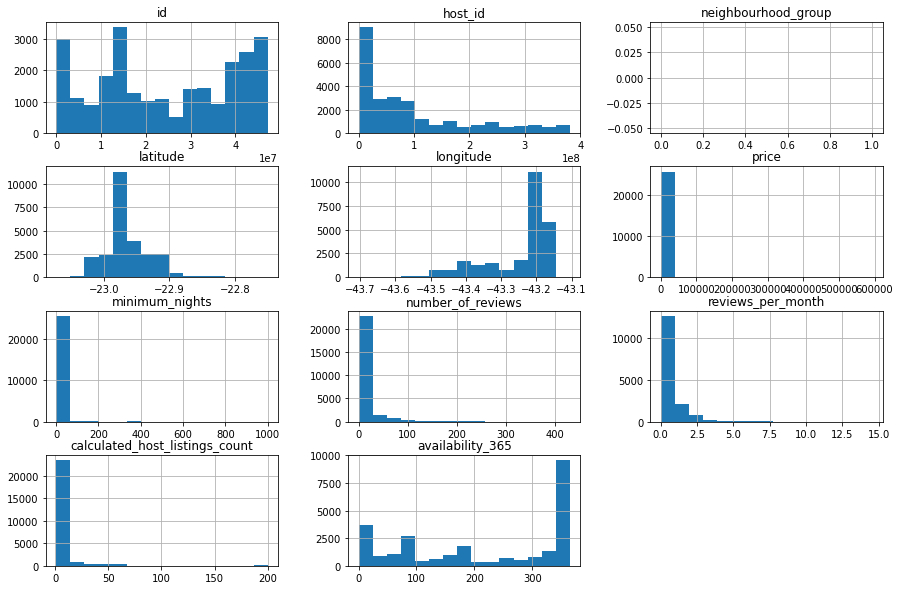

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

Com a análise dos histogramas, percebe-se que as variáveis '**price**', '**minimum_nights**', '**number_of_reviews**', '**reviews_per_month**', **calculated_host_listings_count**', '**availability_365**' precisam ser melhor investigados para avaliar a existência de valores não representativos (outliers).

### **Q4. Existem outliers?**

Os ***outliers***, como ja descrito, são as entradas que não representam o conjunto de dados. Se distoam do comportamento observado no *dataset*. E eles podem ser criados basicamente por dois motivos:
* Naturalmente: Quando uma mansão é oferecida na plataforma;
* Artificialmente: Quando é postado um imóvel com diária a R$0,00 por erro de difitação.

Os outliers, portanto, são prejudiciais para a nossa análise pois não representam a realidade dos fatos. E, por isso, precisam ser tratados.

Vários são os métodos para tratar os outliers. O escolhido para esse projeto é o método do **IQR** para decidir quais entradas serão excluídas da nossa base de dados.

<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
", width="50%"></p>

O IQR (Interquartile Range) é a diferença calculada entre o Q3 (valor aos 75% da amostra ordenada) e o Q1 (valor aos 25% da amostra ordenada) confome representado na figura acima.

São considerados outliers valores inferiores a `1,5*IQR` abaixo do Q1 e superiores a `1,5*IQR` acima do Q3.

O resumo estatístimo apresentado abaixo, apresenta os quartis além da média, do desvio padrão, maximo e mínimo para cada uma das variáveis.


In [ ]:
# Ver resumo estatístico das entradas numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,25784.000000,25784.000000,25784.000000,15852.000000,25784.000000,25784.000000
mean,879.820664,4.767491,11.960479,0.590130,6.582532,215.296114
std,5179.764367,19.042074,29.371931,0.819468,19.995586,140.893876
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,200.000000,1.000000,0.000000,0.100000,1.000000,83.000000
50%,380.000000,2.000000,1.000000,0.240000,1.000000,247.000000
75%,776.000000,4.000000,9.000000,0.780000,3.000000,359.000000
max,593266.000000,1000.000000,431.000000,14.550000,200.000000,365.000000


Com o resumo estatístico das variáveis investigadas, infere-se que:
* Para a variável **price**, apesar da média ser de `R$879,82`, o desvio padrão extremamente alto mostra que as entradas distam bastante desta média. Essa percepção é confimada pelo valor máximo de diária ser de `R$593266,00` enquanto o *Q3* ser `R$776,00`.
* O mesmo raciocínio pode ser aplicado a variável **minimum_nights**, porém, apesar de existirem outliers, o desvio padrão mais baixo indica que essas entradas distoantes são bem menos impactantes da qualidade dos dados.

Os outliers serão tratados da seguinte forma:
* Cálculo do Q1 e Q3;
* Cálculo do IQR;
* Cálculo dos limites superior e inferior;
* Remoção dos outliers.

#### Identificando outliers para minimum_nights

In [ ]:
#Cálculo do Q1 e Q3:
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
#Cálculo do IQR:
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR para a variável minimum_nights:',IQR_minimum_nights)

#Calculando os limites:
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights
print('limite superior:', sup_minimum_nights)
print('limite inferior:', inf_minimum_nights)


Q1: 1.0
Q3: 4.0
IQR para a variável minimum_nights: 3.0
limite superior: 8.5
limite inferior: -3.5


Com os parâmetros calculados, infere-se:
* Não há outliers inferiores visto que o valor mínimo para a variável é 1. (conforme exibido pela função `describe()`)
* Adotaremos, para o limite superior, 8 noites mínimas visto que a variável é do tipo inteiro.

##### Boxplot para minimum_nights
Para realizar um comparativo entre antes e depois da retirada dos outliers, um boxplot será gerado.

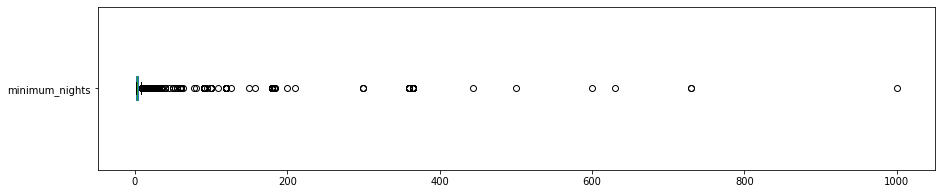


Minimum_night:

Quantidade de entradas para a variável minimum_nights:25784.
Valores acima de 8 dias: 1754 entradas.
O que representa 6.80% do total de entradas.


In [ ]:
df.minimum_nights.plot(kind='box', vert = False, figsize=(15,3))
plt.show()

print("\nMinimum_night:\n")
print('Quantidade de entradas para a variável minimum_nights:{}.'.format(df.shape[0]))
print("Valores acima de 8 dias: {} entradas.".format(len(df[df.minimum_nights>8])))
print("O que representa {:.2f}% do total de entradas.".format((len(df[df.minimum_nights>8])/df.shape[0])*100))


#### Identificando outliers para price

In [ ]:
#Cálculo do Q1 e Q3:
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
#Cálculo do IQR:
IQR_price = q3_price - q1_price
print('IQR para a variável price:',IQR_price)

#Calculando os limites:
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price
print('limite superior:', sup_price)
print('limite inferior:', inf_price)

IQR para a variável price: 576.0
limite superior: 1640.0
limite inferior: -664.0


* Para o limite inferior, será adotado valores iguais a zero, visto que não faz sentido uma habitação por valor de diária a `R$0,00`.
* Para o limite superior, será mantido o valor de `R$1640,00`.

##### Boxplot para price

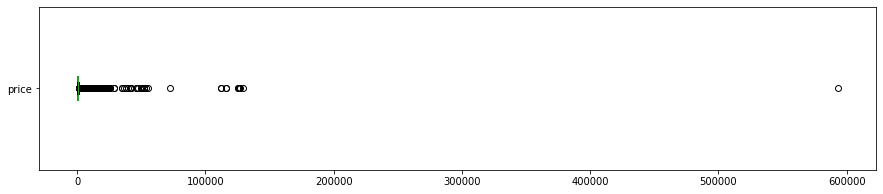


Price:

Quantidade de entradas para a variável price:25784.
Valores acima de R$1640.00: 2145 entradas
O que representa 8.32% do total de entradas


In [ ]:
df.price.plot(kind='box', vert = False, figsize=(15,3))
plt.show()
preco = 1640
print("\nPrice:\n")
print('Quantidade de entradas para a variável price:{}.'.format(df.shape[0]))
print("Valores acima de R$1640.00: {} entradas".format(len(df[df.price>preco])))
print("O que representa {:.2f}% do total de entradas".format((len(df[df.price>preco])/df.shape[0])*100))


#### Removendo os outliers

In [ ]:
#remover os outliers em um novo DataFrame
df_trat = df.copy()
df_trat.drop(df_trat[df_trat.price > 1640].index, axis = 0, inplace = True)
df_trat.drop(df_trat[df_trat.minimum_nights > 8].index, axis = 0, inplace = True)
df_trat.drop(df_trat[df_trat.price == 0].index, axis = 0, inplace = True)

 #remover coluna vazia neighbourhood_group 
df_trat.drop('neighbourhood_group', axis = 1, inplace = True)

# comparativo
print('Número de entradas antes do tratamento dos dados:\t', df.shape[0])
print('Número de entradas após do tratamento dos dados:\t', df_trat.shape[0])
print ('Entradas removidas: {:.2f}% '.format((1-df_trat.shape[0]/df.shape[0])*100))

Número de entradas antes do tratamento dos dados:	 25784
Número de entradas após do tratamento dos dados:	 22121
Entradas removidas: 14.21% 


##### Hitogramas e boxplots sem outliers

Os outliers serão excluídos da base de dados e os histogramas reavaliados.

,price,minimum_nights
count,22121.000000,22121.000000
mean,452.217983,2.691018
std,352.823009,1.624478
min,32.000000,1.000000
25%,193.000000,1.000000
50%,343.000000,2.000000
75%,600.000000,3.000000
max,1636.000000,8.000000


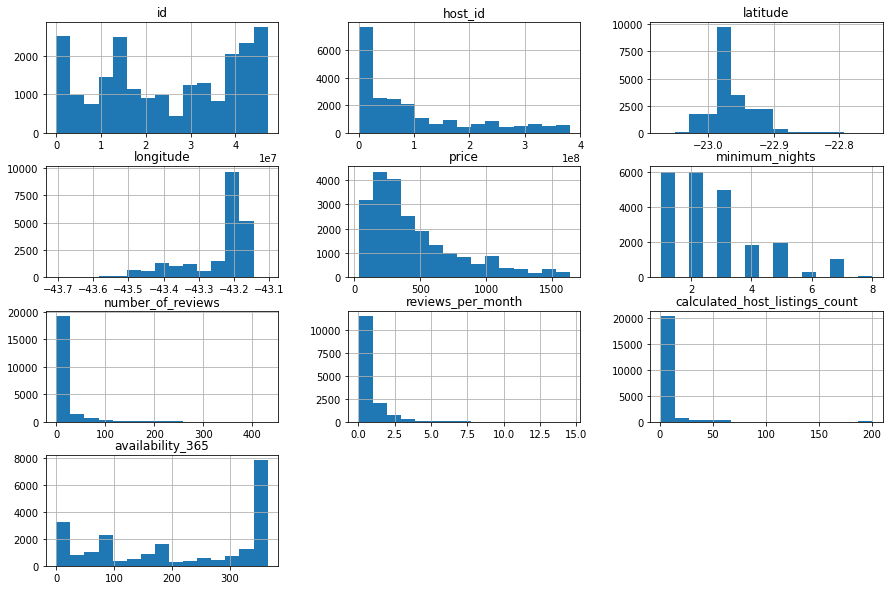

In [ ]:
# Plotando histogramas
df_trat.hist(bins = 15, figsize=(15,10));

# ver dados estatisticos das colunas tratadas
df_trat[['price', "minimum_nights"]].describe()




Boxplot para minimum_nights



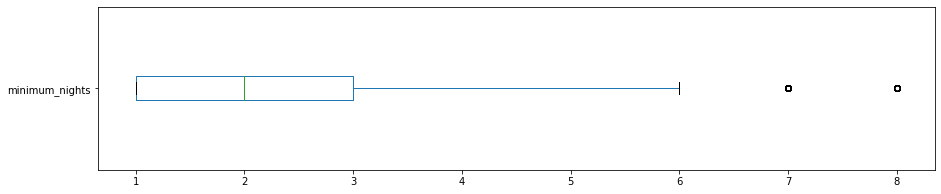

In [ ]:
#boxplot para minimum_nights
print('\nBoxplot para minimum_nights\n')
df_trat.minimum_nights.plot(kind='box', vert = False, figsize=(15,3))
plt.show()


Boxplot para price



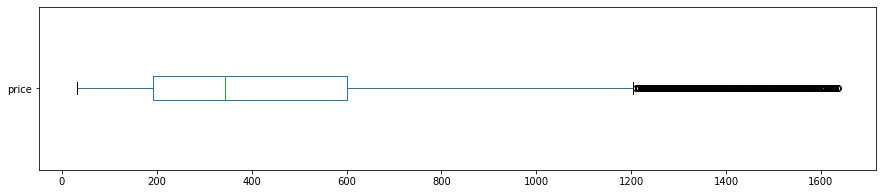

In [ ]:
#boxplot para price
print('\nBoxplot para price\n')
df_trat.price.plot(kind='box', vert = False, figsize=(15,3))
plt.show()

A exclusão dos outliers melhorou a qualidade do banco de dados.

### **Q5. Qual a correlação existente entre as variáveis**

Essa sesão busca encontrar tendencias entre as variáveis e como elas se relacionam.

In [ ]:
# criar uma matriz de correlação
corr = df_trat[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.154362,-0.076451,-0.074673,0.206333,0.041096
minimum_nights,0.154362,1.000000,-0.039927,-0.129222,-0.001367,-0.031401
number_of_reviews,-0.076451,-0.039927,1.000000,0.642594,-0.040711,-0.075255
reviews_per_month,-0.074673,-0.129222,0.642594,1.000000,-0.003293,-0.153457
calculated_host_listings_count,0.206333,-0.001367,-0.040711,-0.003293,1.000000,0.004018
availability_365,0.041096,-0.031401,-0.075255,-0.153457,0.004018,1.000000


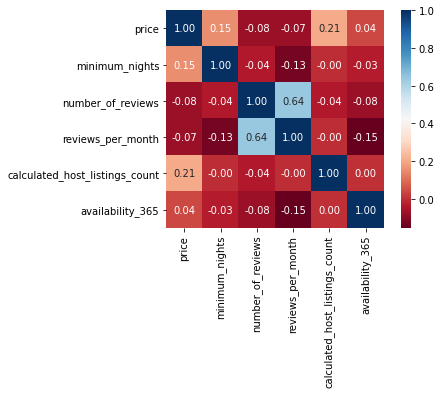

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap = "RdBu", fmt = '.2f', square = True, linecolor = 'white', 
            annot = True);

O mapa de calor foi plotado para evidenciar possíveis correlações. As variáveis **number_of_reviews** e **reviews_per_month** tem uma quase obvia correlação, porém nenhuma das outras variáveis apresentaram correlação positiva significativa.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_trat.room_type.value_counts()

Entire home/apt    15408
Private room        6063
Shared room          557
Hotel room            93
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_trat.room_type.value_counts() / df_trat.shape[0]

Entire home/apt    0.696533
Private room       0.274083
Shared room        0.025180
Hotel room         0.004204
Name: room_type, dtype: float64

O *dataset* mostra que **quase 70%** dos anuncios para o Rio de Janeiro são de **moradias completas** e **quase 30%** de **quartos privativos**. Esse perfil mostra que as habitações para o Rio de Janeiro atendem a um vasto publico. Aqueles que buscam economizar em hospedagem no Rio, tem 6268 opções de quartos privativos que são mais baratos que os imóveis completos.

### **Q7. Qual a localidade mais cara do dataset?**

É possível identificar as localidades mais caras oferecidas na plataforma, agrupando pelos bairros e utilizando a função `mean() ` e ordenando pelo `sort_values`.






In [ ]:
# ver preços por bairros, na média
bairrosmais = df_trat.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:20]
bairrosmais

neighbourhood
Vista Alegre                1262.000000
Grumari                     1003.000000
Osvaldo Cruz                 913.250000
Anchieta                     800.000000
Cacuia                       795.000000
Leblon                       671.368041
Engenho da Rainha            635.750000
Lagoa                        625.277778
Ipanema                      622.005914
Sepetiba                     597.600000
Manguinhos                   593.000000
Freguesia (Ilha)             580.666667
Alto da Boa Vista            549.148148
Barra da Tijuca              544.026031
Vigário Geral                532.500000
Gardênia Azul                524.375000
Complexo do Alemão           520.000000
Barra de Guaratiba           517.632653
Recreio dos Bandeirantes     497.375824
Paciência                    493.600000
Name: price, dtype: float64

Por se tratar de uma média dos valores cobrados em cada bairro, deve-se investigar a quantidade de moradias oferecidas é representativa ou se é mais um outlier.

In [ ]:
for ind in bairrosmais.index:
  print(ind," :", df_trat[df_trat.neighbourhood == ind].shape[0])

Vista Alegre  : 1
Grumari  : 2
Osvaldo Cruz  : 4
Anchieta  : 1
Cacuia  : 2
Leblon  : 970
Engenho da Rainha  : 4
Lagoa  : 198
Ipanema  : 2029
Sepetiba  : 5
Manguinhos  : 2
Freguesia (Ilha)  : 3
Alto da Boa Vista  : 27
Barra da Tijuca  : 2036
Vigário Geral  : 2
Gardênia Azul  : 16
Complexo do Alemão  : 2
Barra de Guaratiba  : 49
Recreio dos Bandeirantes  : 910
Paciência  : 5


Persebe-se que as localidades apontadas como mais caras não tem um número significativo de habitações disponíveis. Com a exclusão desses bairros pouco oferecidos, **Leblon** é tido como o mais caro, em média.

Abaixo será postado a localização de cada uma das habitações ofertadas usando a coordenada de latitude e longitude, tendo como classificador de cor, o preço conforme escala ao lado do mapa.

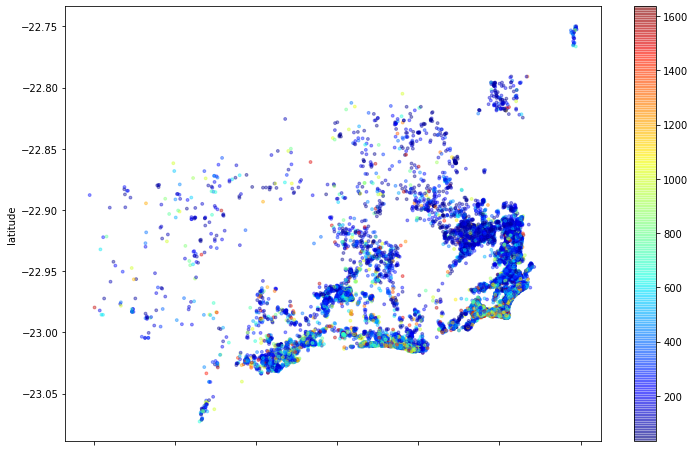

In [ ]:
# plotar os imóveis pela latitude-longitude
df_trat.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_trat['price'],
             s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

Apenas a título de curiosidade, e para melhor vizualização da localização dos imóveis mais caros, será quantificado os bairros com diárias maiores que R$ 1000,00.

Total de habitações caras: 2339 



neighbourhood
Copacabana                  649
Ipanema                     396
Barra da Tijuca             296
Leblon                      204
Recreio dos Bandeirantes    120
Jacarepaguá                 115
Botafogo                     56
Lagoa                        45
Leme                         39
Santa Teresa                 30
Laranjeiras                  24
Tijuca                       23
Maracanã                     22
Flamengo                     21
São Conrado                  20
Gávea                        20
Centro                       19
Jardim Botânico              17
Humaitá                      13
Vila Isabel                  11
Name: price, dtype: int64

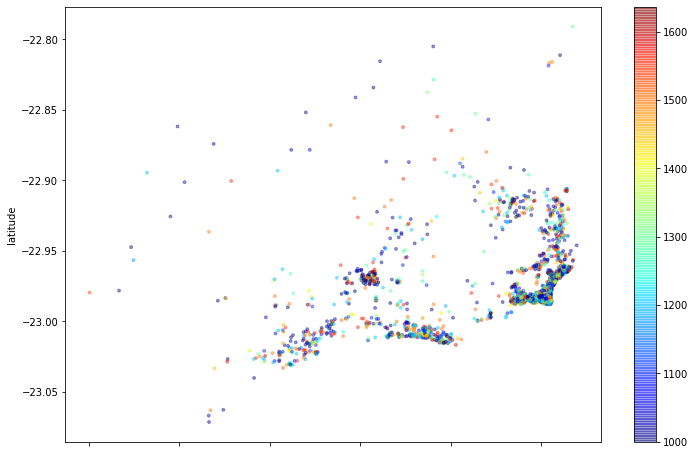

In [ ]:
#remover os outliers em um novo DataFrame
df_caros = df_trat.copy()
df_caros.drop(df_caros[df_caros.price < 1000].index, axis = 0, inplace = True)

print('Total de habitações caras:',df_caros.shape[0],"\n")

df_caros.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_caros['price'],
             s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

bairrosmais = df_caros.groupby(['neighbourhood']).price.count().sort_values(ascending = False)[:20]
display(bairrosmais)


Estrelam o **Top 3** de bairros com maior número de diárias acima de **R$ 1000,00**: **Copacabana, Ipanema e Barra da Tijuca.**

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_trat['minimum_nights'].describe()

count    22121.000000
mean         2.691018
std          1.624478
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: minimum_nights, dtype: float64

A função `describe()` revelou que a média de mínimo de noites exigidas para a reserva. Porém, percebe-se também que a maioria das vagas exigem o mínimo de 2 noites ou menos. Mais uma vez mostrando que o Rio de Janeiro tem vagas para todos os bolsos e objetivos.

## Conclusões


Os dados resumidos disponibilizados pelo portal Insider Airbnb sobre as habitações oferecidas pela plataforma Airbnb para a cidade do Rio de Janeiro trouxeram um panorama geral sobre as características e preferências de hospedagem.

O tratamento da base de dados se mostrou bastante necessário para a remoção dos dados considerados outliers.

Percebe-se uma grande variedade de preços, tipos de acomodações e quantidade de noites mínimas para atender a todos os públicos e objetivos.

